In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm

np.random.seed(1337)
np.set_printoptions(suppress=True)
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000

# Data

In [2]:
# load the training data from the respective filepaths
train_features_filepath = 'data/train_features.csv'
test_features_filepath = 'data/test_features.csv'
train_labels_filepath = 'data/train_labels.csv'

# create the dataframes
train_features_df = pd.read_csv(train_features_filepath, float_precision="round_trip")
test_features_df = pd.read_csv(test_features_filepath, float_precision="round_trip")
train_labels_df = pd.read_csv(train_labels_filepath, float_precision="round_trip")
print("Train shape:", train_features_df.shape, "| Train label shape:", train_labels_df.shape, "| Test shape:", test_features_df.shape)
display(train_features_df.head(40))
display(train_labels_df.head(40))
display(test_features_df.head(30))

display(train_features_df.describe())
display(train_labels_df.describe())

Train shape: (227940, 37) | Train label shape: (18995, 16) | Test shape: (151968, 37)


,pid,Time,Age,EtCO2,PTT,BUN,Lactate,Temp,Hgb,HCO3,BaseExcess,RRate,Fibrinogen,Phosphate,WBC,Creatinine,PaCO2,AST,FiO2,Platelets,SaO2,Glucose,ABPm,Magnesium,Potassium,ABPd,Calcium,Alkalinephos,SpO2,Bilirubin_direct,Chloride,Hct,Heartrate,Bilirubin_total,TroponinI,ABPs,pH
0,1,3,34.0,NaN,NaN,12.0,NaN,36.0,8.7,24.0,-2.0,16.0,NaN,NaN,6.3,NaN,45.0,NaN,NaN,NaN,NaN,NaN,84.0,1.2,3.8,61.0,NaN,NaN,100.0,NaN,114.0,24.6,94.0,NaN,NaN,142.0,7.33
1,1,4,34.0,NaN,NaN,NaN,NaN,36.0,NaN,NaN,-2.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,81.0,NaN,NaN,62.5,NaN,NaN,100.0,NaN,NaN,NaN,99.0,NaN,NaN,125.0,7.33
2,1,5,34.0,NaN,NaN,NaN,NaN,36.0,NaN,NaN,0.0,18.0,NaN,NaN,NaN,NaN,43.0,NaN,0.4,NaN,NaN,NaN,74.0,NaN,NaN,59.0,NaN,NaN,100.0,NaN,NaN,NaN,92.0,NaN,NaN,110.0,7.37
3,1,6,34.0,NaN,NaN,NaN,NaN,37.0,NaN,NaN,0.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0,NaN,NaN,49.5,NaN,NaN,100.0,NaN,NaN,NaN,88.0,NaN,NaN,104.0,7.37
4,1,7,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0,1.8,NaN,48.0,NaN,NaN,100.0,NaN,NaN,22.4,81.0,NaN,NaN,100.0,7.41
5,1,8,34.0,NaN,NaN,NaN,NaN,37.0,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,0.4,NaN,NaN,NaN,68.0,1.8,NaN,51.0,NaN,NaN,100.0,NaN,NaN,22.4,82.0,NaN,NaN,106.0,NaN
6,1,9,34.0,NaN,NaN,NaN,NaN,37.0,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0,NaN,NaN,46.0,NaN,NaN,100.0,NaN,NaN,NaN,67.0,NaN,NaN,112.0,NaN
7,1,10,34.0,NaN,NaN,NaN,NaN,37.0,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.0,NaN,NaN,47.0,NaN,NaN,100.0,NaN,NaN,NaN,62.0,NaN,NaN,121.0,NaN
8,1,11,34.0,NaN,NaN,12.0,NaN,NaN,8.5,26.0,NaN,12.0,NaN,4.6,4.7,0.50,NaN,NaN,NaN,143.0,NaN,120.0,67.0,2.1,4.1,47.0,7.60,NaN,100.0,NaN,111.0,23.8,58.0,NaN,NaN,118.0,NaN
9,1,12,34.0,NaN,NaN,12.0,NaN,38.0,8.5,26.0,0.0,18.0,NaN,NaN,4.7,NaN,42.0,NaN,0.4,NaN,NaN,NaN,62.0,2.1,4.1,44.0,NaN,NaN,100.0,NaN,111.0,23.8,66.0,NaN,NaN,110.0,7.39


,pid,LABEL_BaseExcess,LABEL_Fibrinogen,LABEL_AST,LABEL_Alkalinephos,LABEL_Bilirubin_total,LABEL_Lactate,LABEL_TroponinI,LABEL_SaO2,LABEL_Bilirubin_direct,LABEL_EtCO2,LABEL_Sepsis,LABEL_RRate,LABEL_ABPm,LABEL_SpO2,LABEL_Heartrate
0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.1,85.4,100.0,59.9
1,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.8,100.6,95.5,85.5
2,100,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,16.5,88.3,96.5,108.1
3,1000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,19.4,77.2,98.3,80.9
4,10000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.6,76.8,97.7,95.3
5,10002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.5,67.4,99.1,64.6
6,10006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.2,84.9,96.8,90.5
7,10007,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,23.8,97.0,94.3,76.0
8,10009,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,18.9,72.0,95.3,91.5
9,1001,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,14.9,83.3,99.9,117.3


,pid,Time,Age,EtCO2,PTT,BUN,Lactate,Temp,Hgb,HCO3,BaseExcess,RRate,Fibrinogen,Phosphate,WBC,Creatinine,PaCO2,AST,FiO2,Platelets,SaO2,Glucose,ABPm,Magnesium,Potassium,ABPd,Calcium,Alkalinephos,SpO2,Bilirubin_direct,Chloride,Hct,Heartrate,Bilirubin_total,TroponinI,ABPs,pH
0,0,1,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,2,39.0,NaN,44.2,17.0,NaN,36.0,10.2,13.0,NaN,NaN,147.0,6.0,17.5,2.2,NaN,32.0,0.60,194.0,NaN,273.0,77.0,2.2,4.60,76.0,8.00,119.0,100.0,NaN,98.0,31.0,82.0,21.8,NaN,119.0,NaN
2,0,3,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.0,13.0,NaN,NaN,NaN,NaN,26.0,NaN,0.55,NaN,NaN,NaN,78.0,NaN,NaN,72.5,NaN,NaN,100.0,NaN,NaN,NaN,78.0,NaN,NaN,125.0,7.34
3,0,4,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,0.50,NaN,NaN,NaN,87.0,NaN,NaN,66.0,NaN,NaN,100.0,NaN,NaN,NaN,80.0,NaN,NaN,136.0,NaN
4,0,5,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.0,NaN,NaN,65.0,NaN,NaN,100.0,NaN,NaN,NaN,83.0,NaN,NaN,135.0,NaN
5,0,6,39.0,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0,NaN,NaN,66.0,NaN,NaN,100.0,NaN,NaN,NaN,88.0,NaN,NaN,144.0,NaN
6,0,7,39.0,NaN,38.5,20.0,NaN,NaN,9.1,16.0,NaN,12.0,NaN,4.8,18.5,2.4,NaN,31.0,0.50,193.0,NaN,162.0,NaN,2.5,3.70,NaN,8.30,109.0,100.0,NaN,102.0,25.9,NaN,26.4,NaN,NaN,NaN
7,0,8,39.0,NaN,NaN,NaN,NaN,36.0,NaN,NaN,-4.0,12.0,NaN,NaN,NaN,NaN,30.0,NaN,0.50,NaN,NaN,NaN,80.0,NaN,NaN,59.0,NaN,NaN,100.0,NaN,NaN,NaN,90.0,NaN,NaN,129.0,7.40
8,0,9,39.0,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,NaN,NaN,56.5,NaN,NaN,100.0,NaN,NaN,NaN,90.0,NaN,NaN,121.0,NaN
9,0,10,39.0,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,NaN,NaN,55.0,NaN,NaN,100.0,NaN,NaN,NaN,85.0,NaN,NaN,120.0,NaN


,pid,Time,Age,EtCO2,PTT,BUN,Lactate,Temp,Hgb,HCO3,BaseExcess,RRate,Fibrinogen,Phosphate,WBC,Creatinine,PaCO2,AST,FiO2,Platelets,SaO2,Glucose,ABPm,Magnesium,Potassium,ABPd,Calcium,Alkalinephos,SpO2,Bilirubin_direct,Chloride,Hct,Heartrate,Bilirubin_total,TroponinI,ABPs,pH
count,227940.000000,227940.000000,227940.000000,9783.000000,10299.000000,20105.000000,10756.000000,81115.000000,22295.000000,12559.00000,19887.000000,187785.000000,2493.000000,11590.000000,19083.000000,17792.000000,21043.000000,5761.000000,26602.000000,18035.000000,13014.000000,47036.000000,195889.000000,17523.000000,28393.000000,152418.000000,17830.000000,5708.000000,195192.000000,719.000000,13917.000000,27297.000000,200128.000000,5326.000000,3776.000000,191650.000000,25046.000000
mean,15788.831219,7.014399,62.073809,32.883114,40.091310,23.192664,2.859716,36.852136,10.628208,23.48810,-1.239284,18.154043,262.496911,3.612519,11.738649,1.495777,41.115696,193.444888,0.701666,204.666426,93.010527,142.169407,82.117276,2.004149,4.152729,64.014711,7.161149,97.796163,97.663449,1.390723,106.260185,31.283090,84.522371,1.640941,7.269240,122.369877,7.367231
std,9151.896286,4.716103,16.451854,7.802065,26.034961,20.024289,2.428368,0.875152,2.074859,4.40378,4.192677,5.037031,133.020910,1.384462,10.088872,1.898112,8.929873,682.836708,24.522126,104.156406,10.887271,56.894530,16.471871,0.437286,0.670168,13.920097,2.812067,122.773379,2.786186,2.792722,5.916082,5.770425,17.643437,3.244145,25.172442,23.273834,0.074384
min,1.000000,1.000000,15.000000,10.000000,12.500000,1.000000,0.200000,21.000000,3.300000,0.00000,-29.000000,1.000000,34.000000,0.200000,0.100000,0.100000,10.000000,5.000000,0.000000,2.000000,24.000000,15.000000,20.000000,0.500000,1.300000,20.000000,1.000000,12.000000,20.000000,0.010000,66.000000,9.400000,23.000000,0.100000,0.010000,21.000000,6.820000
25%,7879.000000,4.000000,52.000000,28.500000,27.800000,12.000000,1.400000,36.000000,9.200000,21.00000,-3.000000,15.000000,177.000000,2.800000,7.600000,0.700000,36.000000,21.000000,0.400000,137.000000,95.000000,108.000000,71.000000,1.700000,3.700000,54.250000,7.300000,53.000000,96.000000,0.100000,103.000000,27.300000,72.000000,0.500000,0.030000,105.000000,7.330000
50%,15726.000000,7.000000,64.000000,33.000000,32.200000,17.000000,2.100000,37.000000,10.500000,23.90000,-1.000000,18.000000,233.000000,3.400000,10.400000,0.900000,40.000000,36.000000,0.500000,189.000000,97.000000,130.000000,80.000000,2.000000,4.100000,62.000000,8.200000,72.000000,98.000000,0.300000,107.000000,30.900000,83.000000,0.800000,0.150000,119.000000,7.370000
75%,23725.000000,10.000000,74.000000,38.000000,40.600000,27.000000,3.400000,37.000000,12.000000,26.00000,0.000000,21.000000,316.000000,4.200000,14.000000,1.380000,45.000000,84.000000,0.600000,251.000000,98.000000,160.000000,91.000000,2.200000,4.500000,72.000000,8.700000,104.000000,100.000000,1.210000,110.000000,35.000000,95.000000,1.400000,2.050000,137.000000,7.410000
max,31658.000000,315.000000,100.000000,100.000000,250.000000,268.000000,31.000000,42.000000,23.800000,50.00000,100.000000,97.000000,1179.000000,16.400000,440.000000,41.900000,100.000000,9961.000000,4000.000000,2322.000000,100.000000,952.000000,300.000000,9.600000,10.750000,298.000000,20.600000,3833.000000,100.000000,21.200000,141.000000,63.400000,191.000000,46.500000,440.000000,287.000000,7.780000


,pid,LABEL_BaseExcess,LABEL_Fibrinogen,LABEL_AST,LABEL_Alkalinephos,LABEL_Bilirubin_total,LABEL_Lactate,LABEL_TroponinI,LABEL_SaO2,LABEL_Bilirubin_direct,LABEL_EtCO2,LABEL_Sepsis,LABEL_RRate,LABEL_ABPm,LABEL_SpO2,LABEL_Heartrate
count,18995.000000,18995.000000,18995.000000,18995.000000,18995.00000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000
mean,15788.831219,0.268281,0.073704,0.239747,0.23622,0.240590,0.200211,0.099763,0.233693,0.033904,0.066017,0.057278,18.795960,82.511171,96.947311,84.119716
std,9152.117122,0.443076,0.261295,0.426940,0.42477,0.427453,0.400168,0.299692,0.423190,0.180986,0.248319,0.232380,3.511241,12.745110,2.110957,14.718396
min,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,26.000000,27.000000,30.200000
25%,7879.500000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.550000,73.200000,95.900000,73.700000
50%,15726.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.400000,81.000000,97.100000,83.400000
75%,23724.500000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.600000,90.200000,98.300000,93.600000
max,31658.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,41.100000,147.100000,100.000000,155.600000


## Outliers removal

In [3]:
print(train_labels_df.shape, "| features:", train_features_df.shape)

outlier_columns = [col for col in train_features_df.columns if col not in ['pid', 'Time', 'Age']]

#df = train_features_df[outlier_columns]
#rows_to_keep = df[df.fillna(df.median()).apply(lambda x: np.abs(x - x.mean()) / x.std() < 7).all(axis=1)].index
#train_features_df = train_features_df.iloc[rows_to_keep]

print(train_labels_df.shape, "| features:", train_features_df.shape)

(18995, 16) | features: (227940, 37)
(18995, 16) | features: (227940, 37)


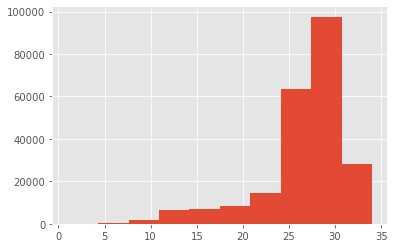

'Number of instances: 227940'

In [4]:
import matplotlib.pyplot as plt

# Plots the number of rows that have 'NaN' values
plt.style.use('ggplot')
plt.hist(train_features_df.isnull().sum(axis=1), bins=10)
plt.show()

display("Number of instances: {}".format(train_features_df.shape[0]))

In [5]:
labels_sepsis_positive = train_labels_df.loc[train_labels_df['LABEL_Sepsis'] == 1]
display(labels_sepsis_positive.describe())
display(labels_sepsis_positive.head(100))

#temp_grouped = group_columns_in_df(train_features_df)
#display(temp_grouped.head(10))
#features_sepsis_positive = temp_grouped.loc[temp_grouped['pid'].isin(labels_sepsis_positive['pid'])]
#scale_df(features_sepsis_positive)
#display(features_sepsis_positive.describe())

,pid,LABEL_BaseExcess,LABEL_Fibrinogen,LABEL_AST,LABEL_Alkalinephos,LABEL_Bilirubin_total,LABEL_Lactate,LABEL_TroponinI,LABEL_SaO2,LABEL_Bilirubin_direct,LABEL_EtCO2,LABEL_Sepsis,LABEL_RRate,LABEL_ABPm,LABEL_SpO2,LABEL_Heartrate
count,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.0,1088.000000,1088.000000,1088.000000,1088.000000
mean,15935.926471,0.547794,0.177390,0.465993,0.460478,0.469669,0.605699,0.129596,0.511949,0.100184,0.189338,1.0,19.881541,80.647059,97.036397,88.546599
std,9166.983876,0.497939,0.382174,0.499072,0.498665,0.499309,0.488925,0.336012,0.500087,0.300383,0.391957,0.0,4.631534,11.236957,2.451813,14.966026
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,51.800000,67.000000,49.800000
25%,8043.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,16.700000,72.800000,95.900000,78.175000
50%,16180.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.0,19.500000,79.550000,97.400000,87.800000
75%,23941.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.0,22.500000,88.000000,98.600000,98.325000
max,31515.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,36.900000,125.300000,100.000000,134.700000


,pid,LABEL_BaseExcess,LABEL_Fibrinogen,LABEL_AST,LABEL_Alkalinephos,LABEL_Bilirubin_total,LABEL_Lactate,LABEL_TroponinI,LABEL_SaO2,LABEL_Bilirubin_direct,LABEL_EtCO2,LABEL_Sepsis,LABEL_RRate,LABEL_ABPm,LABEL_SpO2,LABEL_Heartrate
7,10007,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,23.8,97.0,94.3,76.0
20,10023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,13.3,80.3,96.7,78.0
25,10030,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,17.9,85.3,99.8,95.2
27,10034,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,16.1,89.2,99.7,65.4
31,10038,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,18.4,62.0,97.1,81.1
35,10048,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,18.4,95.5,97.6,98.6
53,10072,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,15.7,78.8,97.6,91.7
83,10116,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,15.8,91.2,99.3,74.9
93,10130,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,20.6,78.2,97.0,101.8
109,10150,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,18.1,72.8,97.9,67.0


# KNN Imputer

In [7]:
from sklearn.impute import KNNImputer
import multiprocessing

print("Train set has NaN values: {}".format(train_features_df.isnull().values.any()))
print("Starting KNN Imputation")
imputer = KNNImputer(n_neighbors=50)
imputer.fit(train_features_df.iloc[:, 2:])

num_processes = multiprocessing.cpu_count()
chunk_size = int(train_features_df.shape[0]/num_processes)

process_chunks = [train_features_df.iloc[train_features_df.index[i: i + chunk_size]] for i in range(0, train_features_df.shape[0], chunk_size)]

def impute_with_knn(df):
    nr_chunks = 1000
    for train_chunk in tqdm(np.array_split(df, nr_chunks)): 
        train_chunk_filled = imputer.transform(train_chunk)
        df.iloc[train_chunk.index] = train_chunk_filled
    return df

#pool = multiprocessing.Pool(processes=num_processes)
#result = pool.map(impute_with_knn, process_chunks)

#for i in range(len(result)):
#    train_features_df.iloc[result[i].index, 2:] = result[i]

train_features_df.iloc[:, 2:] = impute_with_knn(train_features_df.iloc[:, 2:])

imputed_train_filename = 'data/train_features_imputed.csv'
print("Finished KNN Imputation, saving to '{}'.".format(imputed_train_filename))                                         
print("Train set has NaN values: {}".format(train_features_df.isnull().values.any()))
train_features_df.to_csv(imputed_train_filename, index=False)
display(train_features_df.head(600))

Train set has NaN values: True
Starting KNN Imputation


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [4:02:24<00:00, 14.54s/it]


Finished KNN Imputation, saving to 'data/train_features_imputed.csv'.
Train set has NaN values: False


,pid,Time,Age,EtCO2,PTT,BUN,Lactate,Temp,Hgb,HCO3,BaseExcess,RRate,Fibrinogen,Phosphate,WBC,Creatinine,PaCO2,AST,FiO2,Platelets,SaO2,Glucose,ABPm,Magnesium,Potassium,ABPd,Calcium,Alkalinephos,SpO2,Bilirubin_direct,Chloride,Hct,Heartrate,Bilirubin_total,TroponinI,ABPs,pH
0,1,3,34.0,35.36,35.748,12.00,3.2672,36.00,8.7000,24.000,-2.000,16.00,252.470,3.462,6.3000,0.8446,45.000,153.24,0.5218,204.96,96.66,141.97,84.00,1.200,3.8000,61.0000,6.3394,87.16,100.00,2.1798,114.00,24.6000,94.00,1.192,1.9196,142.00,7.3300
1,1,4,34.0,34.86,31.784,17.16,2.4788,36.00,10.9510,21.772,-2.000,16.00,243.960,3.224,10.6240,1.6714,38.624,356.58,0.5000,200.78,98.40,159.75,81.00,1.834,3.9930,62.5000,6.8710,85.30,100.00,3.2316,106.97,33.0760,99.00,2.714,9.3446,125.00,7.3300
2,1,5,34.0,36.59,32.648,15.90,2.5608,36.00,11.4320,24.026,0.000,18.00,253.980,3.328,11.1500,1.3984,43.000,389.52,0.4000,231.30,97.74,144.20,74.00,1.936,4.0796,59.0000,6.9688,91.30,100.00,2.5488,105.79,33.0700,92.00,1.718,4.9482,110.00,7.3700
3,1,6,34.0,36.36,34.798,16.16,2.4116,37.00,11.0620,22.662,0.000,18.00,268.750,3.324,10.1700,1.5116,39.360,206.28,0.4890,198.28,97.66,156.31,66.00,1.946,3.9380,49.5000,7.5852,95.84,100.00,2.5204,106.89,32.5730,88.00,1.558,1.2272,104.00,7.3700
4,1,7,34.0,35.65,36.699,17.86,2.4714,36.94,8.6360,21.656,-1.771,18.00,241.710,3.484,10.6070,1.8674,38.790,185.38,0.4806,160.11,97.82,161.78,63.00,1.800,4.2170,48.0000,6.7862,95.38,100.00,2.3244,107.35,22.4000,81.00,2.662,0.9146,100.00,7.4100
5,1,8,34.0,35.67,36.037,18.20,2.6446,37.00,8.5600,22.209,-1.978,16.00,267.710,3.489,10.0190,1.9580,39.280,212.16,0.4000,164.49,97.08,158.22,68.00,1.800,4.2220,51.0000,6.2990,95.24,100.00,2.3014,107.50,22.4000,82.00,2.446,2.6926,106.00,7.3606
6,1,9,34.0,34.63,34.115,20.34,2.6626,37.00,11.0570,23.051,-3.275,18.00,270.280,3.880,9.6420,1.8836,37.290,347.64,0.5232,185.55,97.86,152.14,65.00,1.918,4.0500,46.0000,7.5412,103.54,100.00,1.7232,105.80,33.3100,67.00,4.156,0.7452,112.00,7.3688
7,1,10,34.0,34.94,34.332,18.98,2.6524,37.00,11.2310,23.287,-3.075,18.00,266.940,3.706,10.2020,1.5614,38.270,349.28,0.5212,191.46,98.54,152.14,68.00,1.876,4.1880,47.0000,7.6302,88.04,100.00,1.7510,106.28,33.8980,62.00,2.854,0.7074,121.00,7.3710
8,1,11,34.0,33.77,40.777,12.00,2.2440,36.70,8.5000,26.000,-1.487,12.00,266.760,4.600,4.7000,0.5000,37.808,308.32,0.5184,143.00,97.72,120.00,67.00,2.100,4.1000,47.0000,7.6000,76.48,100.00,1.6722,111.00,23.8000,58.00,2.850,0.8502,118.00,7.3872
9,1,12,34.0,33.85,35.915,12.00,2.7352,38.00,8.5000,26.000,0.000,18.00,248.230,3.424,4.7000,0.9864,42.000,140.50,0.4000,170.73,97.24,147.03,62.00,2.100,4.1000,44.0000,6.8548,93.40,100.00,1.8752,111.00,23.8000,66.00,3.560,0.7010,110.00,7.3900


## Grouping

* groupby the `'pid'` column values for each age range from `[0, 20, 30, 40, 50, 60, 70, 80, 110]`
* ignore `'Time'` col

In [8]:
def group_columns_in_df(df):
    age_ranges = [0, 20, 30, 40, 50, 60, 70, 80, 110]
    dfs = []
    for i in range(len(age_ranges) - 1):
        age_l = age_ranges[i]
        age_u = age_ranges[i+1]
        sub_df = df[(df['Age'] >= age_l) & (df['Age'] < age_u)]
        sub_df = sub_df.loc[:, sub_df.columns != 'Time'].groupby('pid', as_index=False, sort=False).agg(np.median)
        sub_df = sub_df.fillna(sub_df.median())
        dfs.append(sub_df)
    grouped_df = df.loc[:, df.columns != 'Time'].groupby('pid', as_index=False, sort=False).agg(np.nanmean)
    result = grouped_df.copy()
    result.update(result[['pid']].merge(pd.concat(dfs)))
    result = result.astype({"pid": int})
    assert(grouped_df.shape == result.shape)
    assert(not grouped_df.equals(result))
    return result

X_df = group_columns_in_df(train_features_df)
display(X_df.shape)
display(X_df.head(20))

X_test_df = group_columns_in_df(test_features_df)

(18995, 36)

,pid,Age,EtCO2,PTT,BUN,Lactate,Temp,Hgb,HCO3,BaseExcess,RRate,Fibrinogen,Phosphate,WBC,Creatinine,PaCO2,AST,FiO2,Platelets,SaO2,Glucose,ABPm,Magnesium,Potassium,ABPd,Calcium,Alkalinephos,SpO2,Bilirubin_direct,Chloride,Hct,Heartrate,Bilirubin_total,TroponinI,ABPs,pH
0,1,34.0,35.285,35.2730,17.330,2.6027,36.92,9.8255,23.1450,-1.8080,18.00,259.270,3.4865,10.0945,1.6164,39.0350,260.240,0.4923,188.505,97.78,153.740,67.50,1.897,4.0898,48.5000,6.9335,92.350,100.00,2.1445,106.930,28.5865,75.00,2.6880,0.8824,111.00,7.3705
1,10,71.0,31.260,55.6370,31.910,3.1147,36.72,10.4120,22.9900,-0.6380,16.89,207.780,3.7620,8.6172,2.0714,40.8530,66.600,0.5867,197.880,96.06,153.010,100.50,2.040,4.0640,81.0000,7.5749,90.065,98.00,0.6637,105.770,30.2490,81.00,1.2760,4.3158,136.00,7.3824
2,100,68.0,32.135,48.5290,32.240,3.0575,36.86,10.3310,23.1815,-1.7075,15.00,231.770,3.6290,9.9546,2.0982,41.7970,105.075,0.6082,194.410,95.97,160.900,80.00,2.028,4.0627,63.0000,7.8594,91.580,97.00,1.6078,105.130,30.4190,113.00,1.7000,2.6882,113.00,7.3566
3,1000,79.0,30.230,50.8950,29.360,3.0754,37.00,9.9845,23.5010,-2.1020,12.00,200.769,3.9140,11.5090,1.8498,40.2840,93.180,0.6006,185.680,95.32,141.625,82.53,2.028,4.0582,63.0000,7.6459,85.310,100.00,0.8742,106.740,29.3110,79.00,0.9100,1.9149,130.00,7.3601
4,10000,76.0,31.925,50.8450,30.040,2.8819,36.92,10.5300,23.8375,-2.8190,12.00,213.777,3.9500,11.6326,1.6530,40.7800,91.830,0.5548,179.710,94.10,145.615,68.97,1.958,4.0218,50.2500,7.3662,95.560,98.00,0.9814,106.105,31.1420,76.00,1.1520,2.6543,123.50,7.3448
5,10002,73.0,32.015,55.1400,28.230,2.4885,37.00,10.5201,23.9715,-1.7330,17.62,217.890,3.7660,10.1988,1.7990,39.9920,90.350,0.6009,178.140,95.86,140.040,71.00,1.962,4.2178,49.2500,6.8689,87.390,100.00,0.8735,105.930,30.5150,69.00,1.1230,2.8475,128.54,7.3705
6,10006,51.0,36.920,42.4530,22.310,3.0933,37.05,10.8650,23.0255,-1.7970,21.00,269.200,3.4440,11.0445,1.4483,41.2100,166.730,0.5292,192.710,96.48,146.050,74.50,1.958,4.1608,53.4667,7.6574,107.840,97.95,2.0486,106.880,31.7210,84.50,2.5170,2.6614,113.70,7.3686
7,10007,60.0,32.215,43.3680,27.620,3.2207,36.76,10.6910,22.1960,-2.2245,22.00,240.140,4.1090,9.4500,1.6092,38.8250,217.940,0.5679,193.600,97.40,139.435,111.50,2.002,4.3235,89.5000,7.7954,101.560,94.50,1.0968,106.320,31.5865,89.50,1.4550,4.5308,142.00,7.3577
8,10009,69.0,32.285,54.1440,31.720,3.4980,36.89,10.3965,22.4900,-2.5250,22.50,228.850,3.6310,9.7156,2.2316,40.3000,51.080,0.6000,202.140,96.32,174.220,67.00,2.026,4.0674,66.5000,7.6662,92.750,97.50,1.3706,105.590,30.9534,97.00,1.5405,3.8502,90.50,7.3534
9,1001,36.0,35.770,35.7460,19.180,2.3331,37.04,10.7915,23.9620,6.0000,13.00,290.330,3.4020,10.3105,1.8149,39.3490,290.540,0.4633,213.520,96.63,152.190,86.50,1.836,4.1405,69.5000,6.8519,95.425,100.00,2.8847,106.750,31.3100,106.50,1.9060,2.9934,114.50,7.4626


## Adding features

In [9]:
def max_abs_diff_agg_fn(x):
    if x.isna().all():
        return 0
    else:
        min_val = np.nanmin(x)
        max_val = np.nanmax(x)
        res = np.abs(max_val - min_val)
        return res

def std_dev_agg_fn(x):
    if x.isna().all():
        return 0
    else:
        return np.nanstd(x)
    
def min_agg_fn(x):
    if x.isna().all():
        return np.nan
    else:
        return np.nanmin(x)
    
def max_agg_fn(x):
    if x.isna().all():
        return np.nan
    else:
        return np.nanmax(x)


def add_features(df_to_group, df_to_add_features_to):
    """Add maximum absolute difference features for each column to a dataframe
    
    Args:
        df_to_group (pd.DataFrame): the dataframe that will be grouped by 'pid'
        df_to_add_features_to (pd.DataFrame): the dataframe to add new features to
        
    Returns:
        pd.DataFrame: the new dataframe with all features
    """
    grouped_df = df_to_group.drop(['Age', 'Time'], axis=1).groupby('pid', as_index=False, sort=False)
    ## Maximum Absolute Difference
    mad_features_df = grouped_df.agg(max_abs_diff_agg_fn)
    #mad_features_df = grouped_df.agg(np.nanmean)
    mad_features_df.columns = [str(col) + '_diff' for col in mad_features_df.columns]
    # Remove 'pid' col from features_df
    mad_features_df = mad_features_df.iloc[:, 1:]
    
    ## Std dev.
    std_features_df = grouped_df.agg(std_dev_agg_fn)
    #std_features_df = grouped_df.agg(np.nanmean)
    std_features_df.columns = [str(col) + '_std' for col in std_features_df.columns]
    # Remove 'pid' col from features_df
    std_features_df = std_features_df.iloc[:, 1:]
    
    ## Min
    min_features_df = grouped_df.agg(min_agg_fn)
    #min_features_df = grouped_df.agg(np.nanmean)
    min_features_df.columns = [str(col) + '_min' for col in min_features_df.columns]
    # Remove 'pid' col from features_df
    min_features_df = min_features_df.iloc[:, 1:]
    
    ## Max
    max_features_df = grouped_df.agg(max_agg_fn)
    #max_features_df = grouped_df.agg(np.nanmean)
    max_features_df.columns = [str(col) + '_max' for col in max_features_df.columns]
    # Remove 'pid' col from features_df
    max_features_df = max_features_df.iloc[:, 1:]
    
    ## Fever
    df_to_add_features_to['Fever'] = df_to_add_features_to.apply(lambda row: 1 if row['Temp'] >= 37.5 else 0, axis=1)
    
    ## Result
    return pd.concat([
        df_to_add_features_to, 
        mad_features_df, 
        min_features_df,
        max_features_df, 
        std_features_df
    ], axis=1, sort=False)

X_df = add_features(train_features_df, X_df)

display(X_df.shape)
display(X_df.describe())
display(X_df.head(30))

X_test_df = add_features(test_features_df, X_test_df)

X_df_backup = X_df.copy()
X_test_df_backup = X_test_df.copy()

(18995, 173)

,pid,Age,EtCO2,PTT,BUN,Lactate,Temp,Hgb,HCO3,BaseExcess,RRate,Fibrinogen,Phosphate,WBC,Creatinine,PaCO2,AST,FiO2,Platelets,SaO2,Glucose,ABPm,Magnesium,Potassium,ABPd,Calcium,Alkalinephos,SpO2,Bilirubin_direct,Chloride,Hct,Heartrate,Bilirubin_total,TroponinI,ABPs,pH,Fever,EtCO2_diff,PTT_diff,BUN_diff,Lactate_diff,Temp_diff,Hgb_diff,HCO3_diff,BaseExcess_diff,RRate_diff,Fibrinogen_diff,Phosphate_diff,WBC_diff,Creatinine_diff,PaCO2_diff,AST_diff,FiO2_diff,Platelets_diff,SaO2_diff,Glucose_diff,ABPm_diff,Magnesium_diff,Potassium_diff,ABPd_diff,Calcium_diff,Alkalinephos_diff,SpO2_diff,Bilirubin_direct_diff,Chloride_diff,Hct_diff,Heartrate_diff,Bilirubin_total_diff,TroponinI_diff,ABPs_diff,pH_diff,EtCO2_min,PTT_min,BUN_min,Lactate_min,Temp_min,Hgb_min,HCO3_min,BaseExcess_min,RRate_min,Fibrinogen_min,Phosphate_min,WBC_min,Creatinine_min,PaCO2_min,AST_min,FiO2_min,Platelets_min,SaO2_min,Glucose_min,ABPm_min,Magnesium_min,Potassium_min,ABPd_min,Calcium_min,Alkalinephos_min,SpO2_min,Bilirubin_direct_min,Chloride_min,Hct_min,Heartrate_min,Bilirubin_total_min,TroponinI_min,ABPs_min,pH_min,EtCO2_max,PTT_max,BUN_max,Lactate_max,Temp_max,Hgb_max,HCO3_max,BaseExcess_max,RRate_max,Fibrinogen_max,Phosphate_max,WBC_max,Creatinine_max,PaCO2_max,AST_max,FiO2_max,Platelets_max,SaO2_max,Glucose_max,ABPm_max,Magnesium_max,Potassium_max,ABPd_max,Calcium_max,Alkalinephos_max,SpO2_max,Bilirubin_direct_max,Chloride_max,Hct_max,Heartrate_max,Bilirubin_total_max,TroponinI_max,ABPs_max,pH_max,EtCO2_std,PTT_std,BUN_std,Lactate_std,Temp_std,Hgb_std,HCO3_std,BaseExcess_std,RRate_std,Fibrinogen_std,Phosphate_std,WBC_std,Creatinine_std,PaCO2_std,AST_std,FiO2_std,Platelets_std,SaO2_std,Glucose_std,ABPm_std,Magnesium_std,Potassium_std,ABPd_std,Calcium_std,Alkalinephos_std,SpO2_std,Bilirubin_direct_std,Chloride_std,Hct_std,Heartrate_std,Bilirubin_total_std,TroponinI_std,ABPs_std,pH_std
count,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.00000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.00000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,1.899500e+04,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,1.899500e+04,18995.000000,1.899500e+04,18995.000000,1.899500e+04,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,1.899500e+04,1.899500e+04,1.899500e+04

,pid,Age,EtCO2,PTT,BUN,Lactate,Temp,Hgb,HCO3,BaseExcess,RRate,Fibrinogen,Phosphate,WBC,Creatinine,PaCO2,AST,FiO2,Platelets,SaO2,Glucose,ABPm,Magnesium,Potassium,ABPd,Calcium,Alkalinephos,SpO2,Bilirubin_direct,Chloride,Hct,Heartrate,Bilirubin_total,TroponinI,ABPs,pH,Fever,EtCO2_diff,PTT_diff,BUN_diff,Lactate_diff,Temp_diff,Hgb_diff,HCO3_diff,BaseExcess_diff,RRate_diff,Fibrinogen_diff,Phosphate_diff,WBC_diff,Creatinine_diff,PaCO2_diff,AST_diff,FiO2_diff,Platelets_diff,SaO2_diff,Glucose_diff,ABPm_diff,Magnesium_diff,Potassium_diff,ABPd_diff,Calcium_diff,Alkalinephos_diff,SpO2_diff,Bilirubin_direct_diff,Chloride_diff,Hct_diff,Heartrate_diff,Bilirubin_total_diff,TroponinI_diff,ABPs_diff,pH_diff,EtCO2_min,PTT_min,BUN_min,Lactate_min,Temp_min,Hgb_min,HCO3_min,BaseExcess_min,RRate_min,Fibrinogen_min,Phosphate_min,WBC_min,Creatinine_min,PaCO2_min,AST_min,FiO2_min,Platelets_min,SaO2_min,Glucose_min,ABPm_min,Magnesium_min,Potassium_min,ABPd_min,Calcium_min,Alkalinephos_min,SpO2_min,Bilirubin_direct_min,Chloride_min,Hct_min,Heartrate_min,Bilirubin_total_min,TroponinI_min,ABPs_min,pH_min,EtCO2_max,PTT_max,BUN_max,Lactate_max,Temp_max,Hgb_max,HCO3_max,BaseExcess_max,RRate_max,Fibrinogen_max,Phosphate_max,WBC_max,Creatinine_max,PaCO2_max,AST_max,FiO2_max,Platelets_max,SaO2_max,Glucose_max,ABPm_max,Magnesium_max,Potassium_max,ABPd_max,Calcium_max,Alkalinephos_max,SpO2_max,Bilirubin_direct_max,Chloride_max,Hct_max,Heartrate_max,Bilirubin_total_max,TroponinI_max,ABPs_max,pH_max,EtCO2_std,PTT_std,BUN_std,Lactate_std,Temp_std,Hgb_std,HCO3_std,BaseExcess_std,RRate_std,Fibrinogen_std,Phosphate_std,WBC_std,Creatinine_std,PaCO2_std,AST_std,FiO2_std,Platelets_std,SaO2_std,Glucose_std,ABPm_std,Magnesium_std,Potassium_std,ABPd_std,Calcium_std,Alkalinephos_std,SpO2_std,Bilirubin_direct_std,Chloride_std,Hct_std,Heartrate_std,Bilirubin_total_std,TroponinI_std,ABPs_std,pH_std
0,1,34.0,35.285,35.2730,17.330,2.6027,36.92,9.8255,23.1450,-1.8080,18.00,259.270,3.4865,10.0945,1.6164,39.0350,260.240,0.4923,188.505,97.78,153.740,67.50,1.897,4.0898,48.5000,6.9335,92.350,100.00,2.1445,106.930,28.5865,75.00,2.6880,0.8824,111.00,7.3705,0,2.82,8.993,8.34,1.0232,2.00,2.9540,4.344,3.275,6.00,36.480,1.376,6.4500,1.6794,7.710,249.02,0.1232,88.30,1.88,43.10,31.00,0.900,0.4680,23.5000,1.3312,48.58,0.00,1.5594,8.85,11.6980,41.00,2.964,8.8230,42.00,0.0800,33.77,31.784,12.00,2.2440,36.00,8.5000,21.656,-3.275,12.00,233.800,3.224,4.7000,0.5000,37.290,140.50,0.4000,143.00,96.66,120.00,53.00,1.200,3.8000,39.00,6.2990,76.48,100.00,1.6722,105.15,22.2000,58.00,1.192,0.5216,100.00,7.3300,36.59,40.777,20.34,3.2672,38.00,11.454,26.000,0.000,18.00,270.280,4.600,11.1500,2.1794,45.000,389.52,0.5232,231.30,98.54,163.10,84.00,2.100,4.2680,62.5000,7.6302,125.06,100.00,3.2316,114.00,33.898,99.00,4.156,9.3446,142.00,7.4100,0.838283,2.193752,2.841988,0.257435,0.544304,1.320414,1.370701,1.137446,1.732051,11.996526,0.398827,2.242045,0.477803,2.243836,89.338264,0.047200,23.262240,0.508426,11.348575,7.961714,0.222131,0.127943,6.799203,0.454585,11.401490,0.000000,0.422778,2.598438,4.995788,13.325779,0.801408,2.496202,11.572237,0.022364
1,10,71.0,31.260,55.6370,31.910,3.1147,36.72,10.4120,22.9900,-0.6380,16.89,207.780,3.7620,8.6172,2.0714,40.8530,66.600,0.5867,197.880,96.06,153.010,100.50,2.040,4.0640,81.0000,7.5749,90.065,98.00,0.6637,105.770,30.2490,81.00,1.2760,4.3158,136.00,7.3824,0,2.97,30.564,22.38,0.7638,0.88,4.2310,2.146,0.845,8.00,74.670,1.448,3.9818,1.6014,1.812,89.74,0.0742,17.24,4.20,29.47,46.04,0.582,1.0336,35.0000,1.3038,31.39,3.00,0.8680,2.65,12.4180,21.08,0.466,7.7986,39.00,0.0244,29.71,27.800,12.00,2.3824,36.00,10.3690,22.626,-1.279,15.00,203.060,2.500,8.3102,0.8200,40.080,20.00,0.5368,192.10,91.92,134.31,73.96,1.500,3.2000,64.00,7.2962,68.00,96.00,0.2994,104.97,29.6820,69.00,1.136,0.0100,113.00,7.3592,32.68,58.364,34.38,3.1462,36.88,14.600,24.772,-0.434,23.00,277.730,3.948,12.2920,2.4214,41.892,109.74,0.6110,209.34,96.12,163.78,120.00,2.082,4.2336,99.0000,8.6000,99.39,99.00,1.1674,107.

In [10]:
X_df = X_df_backup.copy()
X_test_df = X_test_df_backup.copy()

## Data imputation

In [11]:
def median_impute_df(df):
    return df.fillna(df.median())

def impute_min_max_df(df):
    filled_cols = [col for col in X_df if (all([not col.endswith(suffix) for suffix in ['_min', '_max', '_diff', '_std']])) and col != 'pid' and col != 'Age']
    df_filled = df[filled_cols].copy()
    
    min_cols = [col for col in X_df if col.endswith('_min')]
    df_filled.columns = min_cols
    df[min_cols] = df[min_cols].fillna(df_filled)
    
    max_cols = [col for col in X_df if col.endswith('_max')]
    df_filled.columns = max_cols
    df[max_cols] = df[max_cols].fillna(df_filled)
    return df

def impute_df(df):
    summarized_cols = ['_min', '_max', '_diff', '_std', '_25%', '_75%']
    filled_cols = [col for col in X_df if (all([not col.endswith(suffix) for suffix in summarized_cols])) and col != 'pid' and col != 'Age' and col != 'Fever']
    df_filled = df[filled_cols].copy()

    assert(df[filled_cols].equals(df_filled.fillna(df_filled.median())))
    min_cols = [col for col in df if col.endswith('_min')]
    df_filled.columns = min_cols
    df[min_cols] = df[min_cols].fillna(df_filled)

    max_cols = [col for col in df if col.endswith('_max')]
    df_filled.columns = max_cols
    df[max_cols] = df[max_cols].fillna(df_filled)
    return df


"""median_cols = [col for col in X_df if not col.endswith('_max') and not col.endswith('_min')]
display(X_df.head(20))
X_df[median_cols] = median_impute_df(X_df[median_cols].copy())
display(X_df.head(30))
X_df = impute_min_max_df(X_df)
display(X_df.head(30))"""

display("------Train------")
display(X_df.head(20))
X_df = impute_df(X_df)
display(X_df.head(20))
display("------Test------")
X_test_df = impute_df(X_test_df)

"""median_cols = [col for col in X_test_df if not col.endswith('_max') and not col.endswith('_min')]
X_test_df[median_cols] = median_impute_df(X_test_df[median_cols].copy())
X_test_df = impute_min_max_df(X_test_df)"""

'------Train------'

,pid,Age,EtCO2,PTT,BUN,Lactate,Temp,Hgb,HCO3,BaseExcess,RRate,Fibrinogen,Phosphate,WBC,Creatinine,PaCO2,AST,FiO2,Platelets,SaO2,Glucose,ABPm,Magnesium,Potassium,ABPd,Calcium,Alkalinephos,SpO2,Bilirubin_direct,Chloride,Hct,Heartrate,Bilirubin_total,TroponinI,ABPs,pH,Fever,EtCO2_diff,PTT_diff,BUN_diff,Lactate_diff,Temp_diff,Hgb_diff,HCO3_diff,BaseExcess_diff,RRate_diff,Fibrinogen_diff,Phosphate_diff,WBC_diff,Creatinine_diff,PaCO2_diff,AST_diff,FiO2_diff,Platelets_diff,SaO2_diff,Glucose_diff,ABPm_diff,Magnesium_diff,Potassium_diff,ABPd_diff,Calcium_diff,Alkalinephos_diff,SpO2_diff,Bilirubin_direct_diff,Chloride_diff,Hct_diff,Heartrate_diff,Bilirubin_total_diff,TroponinI_diff,ABPs_diff,pH_diff,EtCO2_min,PTT_min,BUN_min,Lactate_min,Temp_min,Hgb_min,HCO3_min,BaseExcess_min,RRate_min,Fibrinogen_min,Phosphate_min,WBC_min,Creatinine_min,PaCO2_min,AST_min,FiO2_min,Platelets_min,SaO2_min,Glucose_min,ABPm_min,Magnesium_min,Potassium_min,ABPd_min,Calcium_min,Alkalinephos_min,SpO2_min,Bilirubin_direct_min,Chloride_min,Hct_min,Heartrate_min,Bilirubin_total_min,TroponinI_min,ABPs_min,pH_min,EtCO2_max,PTT_max,BUN_max,Lactate_max,Temp_max,Hgb_max,HCO3_max,BaseExcess_max,RRate_max,Fibrinogen_max,Phosphate_max,WBC_max,Creatinine_max,PaCO2_max,AST_max,FiO2_max,Platelets_max,SaO2_max,Glucose_max,ABPm_max,Magnesium_max,Potassium_max,ABPd_max,Calcium_max,Alkalinephos_max,SpO2_max,Bilirubin_direct_max,Chloride_max,Hct_max,Heartrate_max,Bilirubin_total_max,TroponinI_max,ABPs_max,pH_max,EtCO2_std,PTT_std,BUN_std,Lactate_std,Temp_std,Hgb_std,HCO3_std,BaseExcess_std,RRate_std,Fibrinogen_std,Phosphate_std,WBC_std,Creatinine_std,PaCO2_std,AST_std,FiO2_std,Platelets_std,SaO2_std,Glucose_std,ABPm_std,Magnesium_std,Potassium_std,ABPd_std,Calcium_std,Alkalinephos_std,SpO2_std,Bilirubin_direct_std,Chloride_std,Hct_std,Heartrate_std,Bilirubin_total_std,TroponinI_std,ABPs_std,pH_std
0,1,34.0,35.285,35.2730,17.330,2.6027,36.92,9.8255,23.1450,-1.8080,18.00,259.270,3.4865,10.0945,1.6164,39.0350,260.240,0.4923,188.505,97.78,153.740,67.50,1.897,4.0898,48.5000,6.9335,92.350,100.00,2.1445,106.930,28.5865,75.00,2.6880,0.8824,111.00,7.3705,0,2.82,8.993,8.34,1.0232,2.00,2.9540,4.344,3.275,6.00,36.480,1.376,6.4500,1.6794,7.710,249.02,0.1232,88.30,1.88,43.10,31.00,0.900,0.4680,23.5000,1.3312,48.58,0.00,1.5594,8.85,11.6980,41.00,2.964,8.8230,42.00,0.0800,33.77,31.784,12.00,2.2440,36.00,8.5000,21.656,-3.275,12.00,233.800,3.224,4.7000,0.5000,37.290,140.50,0.4000,143.00,96.66,120.00,53.00,1.200,3.8000,39.00,6.2990,76.48,100.00,1.6722,105.15,22.2000,58.00,1.192,0.5216,100.00,7.3300,36.59,40.777,20.34,3.2672,38.00,11.454,26.000,0.000,18.00,270.280,4.600,11.1500,2.1794,45.000,389.52,0.5232,231.30,98.54,163.10,84.00,2.100,4.2680,62.5000,7.6302,125.06,100.00,3.2316,114.00,33.898,99.00,4.156,9.3446,142.00,7.4100,0.838283,2.193752,2.841988,0.257435,0.544304,1.320414,1.370701,1.137446,1.732051,11.996526,0.398827,2.242045,0.477803,2.243836,89.338264,0.047200,23.262240,0.508426,11.348575,7.961714,0.222131,0.127943,6.799203,0.454585,11.401490,0.000000,0.422778,2.598438,4.995788,13.325779,0.801408,2.496202,11.572237,0.022364
1,10,71.0,31.260,55.6370,31.910,3.1147,36.72,10.4120,22.9900,-0.6380,16.89,207.780,3.7620,8.6172,2.0714,40.8530,66.600,0.5867,197.880,96.06,153.010,100.50,2.040,4.0640,81.0000,7.5749,90.065,98.00,0.6637,105.770,30.2490,81.00,1.2760,4.3158,136.00,7.3824,0,2.97,30.564,22.38,0.7638,0.88,4.2310,2.146,0.845,8.00,74.670,1.448,3.9818,1.6014,1.812,89.74,0.0742,17.24,4.20,29.47,46.04,0.582,1.0336,35.0000,1.3038,31.39,3.00,0.8680,2.65,12.4180,21.08,0.466,7.7986,39.00,0.0244,29.71,27.800,12.00,2.3824,36.00,10.3690,22.626,-1.279,15.00,203.060,2.500,8.3102,0.8200,40.080,20.00,0.5368,192.10,91.92,134.31,73.96,1.500,3.2000,64.00,7.2962,68.00,96.00,0.2994,104.97,29.6820,69.00,1.136,0.0100,113.00,7.3592,32.68,58.364,34.38,3.1462,36.88,14.600,24.772,-0.434,23.00,277.730,3.948,12.2920,2.4214,41.892,109.74,0.6110,209.34,96.12,163.78,120.00,2.082,4.2336,99.0000,8.6000,99.39,99.00,1.1674,107.

,pid,Age,EtCO2,PTT,BUN,Lactate,Temp,Hgb,HCO3,BaseExcess,RRate,Fibrinogen,Phosphate,WBC,Creatinine,PaCO2,AST,FiO2,Platelets,SaO2,Glucose,ABPm,Magnesium,Potassium,ABPd,Calcium,Alkalinephos,SpO2,Bilirubin_direct,Chloride,Hct,Heartrate,Bilirubin_total,TroponinI,ABPs,pH,Fever,EtCO2_diff,PTT_diff,BUN_diff,Lactate_diff,Temp_diff,Hgb_diff,HCO3_diff,BaseExcess_diff,RRate_diff,Fibrinogen_diff,Phosphate_diff,WBC_diff,Creatinine_diff,PaCO2_diff,AST_diff,FiO2_diff,Platelets_diff,SaO2_diff,Glucose_diff,ABPm_diff,Magnesium_diff,Potassium_diff,ABPd_diff,Calcium_diff,Alkalinephos_diff,SpO2_diff,Bilirubin_direct_diff,Chloride_diff,Hct_diff,Heartrate_diff,Bilirubin_total_diff,TroponinI_diff,ABPs_diff,pH_diff,EtCO2_min,PTT_min,BUN_min,Lactate_min,Temp_min,Hgb_min,HCO3_min,BaseExcess_min,RRate_min,Fibrinogen_min,Phosphate_min,WBC_min,Creatinine_min,PaCO2_min,AST_min,FiO2_min,Platelets_min,SaO2_min,Glucose_min,ABPm_min,Magnesium_min,Potassium_min,ABPd_min,Calcium_min,Alkalinephos_min,SpO2_min,Bilirubin_direct_min,Chloride_min,Hct_min,Heartrate_min,Bilirubin_total_min,TroponinI_min,ABPs_min,pH_min,EtCO2_max,PTT_max,BUN_max,Lactate_max,Temp_max,Hgb_max,HCO3_max,BaseExcess_max,RRate_max,Fibrinogen_max,Phosphate_max,WBC_max,Creatinine_max,PaCO2_max,AST_max,FiO2_max,Platelets_max,SaO2_max,Glucose_max,ABPm_max,Magnesium_max,Potassium_max,ABPd_max,Calcium_max,Alkalinephos_max,SpO2_max,Bilirubin_direct_max,Chloride_max,Hct_max,Heartrate_max,Bilirubin_total_max,TroponinI_max,ABPs_max,pH_max,EtCO2_std,PTT_std,BUN_std,Lactate_std,Temp_std,Hgb_std,HCO3_std,BaseExcess_std,RRate_std,Fibrinogen_std,Phosphate_std,WBC_std,Creatinine_std,PaCO2_std,AST_std,FiO2_std,Platelets_std,SaO2_std,Glucose_std,ABPm_std,Magnesium_std,Potassium_std,ABPd_std,Calcium_std,Alkalinephos_std,SpO2_std,Bilirubin_direct_std,Chloride_std,Hct_std,Heartrate_std,Bilirubin_total_std,TroponinI_std,ABPs_std,pH_std
0,1,34.0,35.285,35.2730,17.330,2.6027,36.92,9.8255,23.1450,-1.8080,18.00,259.270,3.4865,10.0945,1.6164,39.0350,260.240,0.4923,188.505,97.78,153.740,67.50,1.897,4.0898,48.5000,6.9335,92.350,100.00,2.1445,106.930,28.5865,75.00,2.6880,0.8824,111.00,7.3705,0,2.82,8.993,8.34,1.0232,2.00,2.9540,4.344,3.275,6.00,36.480,1.376,6.4500,1.6794,7.710,249.02,0.1232,88.30,1.88,43.10,31.00,0.900,0.4680,23.5000,1.3312,48.58,0.00,1.5594,8.85,11.6980,41.00,2.964,8.8230,42.00,0.0800,33.77,31.784,12.00,2.2440,36.00,8.5000,21.656,-3.275,12.00,233.800,3.224,4.7000,0.5000,37.290,140.50,0.4000,143.00,96.66,120.00,53.00,1.200,3.8000,39.00,6.2990,76.48,100.00,1.6722,105.15,22.2000,58.00,1.192,0.5216,100.00,7.3300,36.59,40.777,20.34,3.2672,38.00,11.454,26.000,0.000,18.00,270.280,4.600,11.1500,2.1794,45.000,389.52,0.5232,231.30,98.54,163.10,84.00,2.100,4.2680,62.5000,7.6302,125.06,100.00,3.2316,114.00,33.898,99.00,4.156,9.3446,142.00,7.4100,0.838283,2.193752,2.841988,0.257435,0.544304,1.320414,1.370701,1.137446,1.732051,11.996526,0.398827,2.242045,0.477803,2.243836,89.338264,0.047200,23.262240,0.508426,11.348575,7.961714,0.222131,0.127943,6.799203,0.454585,11.401490,0.000000,0.422778,2.598438,4.995788,13.325779,0.801408,2.496202,11.572237,0.022364
1,10,71.0,31.260,55.6370,31.910,3.1147,36.72,10.4120,22.9900,-0.6380,16.89,207.780,3.7620,8.6172,2.0714,40.8530,66.600,0.5867,197.880,96.06,153.010,100.50,2.040,4.0640,81.0000,7.5749,90.065,98.00,0.6637,105.770,30.2490,81.00,1.2760,4.3158,136.00,7.3824,0,2.97,30.564,22.38,0.7638,0.88,4.2310,2.146,0.845,8.00,74.670,1.448,3.9818,1.6014,1.812,89.74,0.0742,17.24,4.20,29.47,46.04,0.582,1.0336,35.0000,1.3038,31.39,3.00,0.8680,2.65,12.4180,21.08,0.466,7.7986,39.00,0.0244,29.71,27.800,12.00,2.3824,36.00,10.3690,22.626,-1.279,15.00,203.060,2.500,8.3102,0.8200,40.080,20.00,0.5368,192.10,91.92,134.31,73.96,1.500,3.2000,64.00,7.2962,68.00,96.00,0.2994,104.97,29.6820,69.00,1.136,0.0100,113.00,7.3592,32.68,58.364,34.38,3.1462,36.88,14.600,24.772,-0.434,23.00,277.730,3.948,12.2920,2.4214,41.892,109.74,0.6110,209.34,96.12,163.78,120.00,2.082,4.2336,99.0000,8.6000,99.39,99.00,1.1674,107.

'------Test------'

"median_cols = [col for col in X_test_df if not col.endswith('_max') and not col.endswith('_min')]\nX_test_df[median_cols] = median_impute_df(X_test_df[median_cols].copy())\nX_test_df = impute_min_max_df(X_test_df)"

## Scaling / normalization

In [12]:
from sklearn import preprocessing

# Scale the dataframe
def scale_df(df, scaler=None):
    if scaler is None:
        scaler = preprocessing.MinMaxScaler()
        df.loc[:, df.columns != 'pid'] = scaler.fit_transform(df.loc[:, df.columns != 'pid'])
        return scaler
    else:
        df.loc[:, df.columns != 'pid'] = scaler.transform(df.loc[:, df.columns != 'pid'])
        return scaler

scaler = scale_df(X_df)
display(X_df.describe())
_ = display(X_df.head(30), scaler)

scale_df(X_test_df)

,pid,Age,EtCO2,PTT,BUN,Lactate,Temp,Hgb,HCO3,BaseExcess,RRate,Fibrinogen,Phosphate,WBC,Creatinine,PaCO2,AST,FiO2,Platelets,SaO2,Glucose,ABPm,Magnesium,Potassium,ABPd,Calcium,Alkalinephos,SpO2,Bilirubin_direct,Chloride,Hct,Heartrate,Bilirubin_total,TroponinI,ABPs,pH,Fever,EtCO2_diff,PTT_diff,BUN_diff,Lactate_diff,Temp_diff,Hgb_diff,HCO3_diff,BaseExcess_diff,RRate_diff,Fibrinogen_diff,Phosphate_diff,WBC_diff,Creatinine_diff,PaCO2_diff,AST_diff,FiO2_diff,Platelets_diff,SaO2_diff,Glucose_diff,ABPm_diff,Magnesium_diff,Potassium_diff,ABPd_diff,Calcium_diff,Alkalinephos_diff,SpO2_diff,Bilirubin_direct_diff,Chloride_diff,Hct_diff,Heartrate_diff,Bilirubin_total_diff,TroponinI_diff,ABPs_diff,pH_diff,EtCO2_min,PTT_min,BUN_min,Lactate_min,Temp_min,Hgb_min,HCO3_min,BaseExcess_min,RRate_min,Fibrinogen_min,Phosphate_min,WBC_min,Creatinine_min,PaCO2_min,AST_min,FiO2_min,Platelets_min,SaO2_min,Glucose_min,ABPm_min,Magnesium_min,Potassium_min,ABPd_min,Calcium_min,Alkalinephos_min,SpO2_min,Bilirubin_direct_min,Chloride_min,Hct_min,Heartrate_min,Bilirubin_total_min,TroponinI_min,ABPs_min,pH_min,EtCO2_max,PTT_max,BUN_max,Lactate_max,Temp_max,Hgb_max,HCO3_max,BaseExcess_max,RRate_max,Fibrinogen_max,Phosphate_max,WBC_max,Creatinine_max,PaCO2_max,AST_max,FiO2_max,Platelets_max,SaO2_max,Glucose_max,ABPm_max,Magnesium_max,Potassium_max,ABPd_max,Calcium_max,Alkalinephos_max,SpO2_max,Bilirubin_direct_max,Chloride_max,Hct_max,Heartrate_max,Bilirubin_total_max,TroponinI_max,ABPs_max,pH_max,EtCO2_std,PTT_std,BUN_std,Lactate_std,Temp_std,Hgb_std,HCO3_std,BaseExcess_std,RRate_std,Fibrinogen_std,Phosphate_std,WBC_std,Creatinine_std,PaCO2_std,AST_std,FiO2_std,Platelets_std,SaO2_std,Glucose_std,ABPm_std,Magnesium_std,Potassium_std,ABPd_std,Calcium_std,Alkalinephos_std,SpO2_std,Bilirubin_direct_std,Chloride_std,Hct_std,Heartrate_std,Bilirubin_total_std,TroponinI_std,ABPs_std,pH_std
count,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.0000

,pid,Age,EtCO2,PTT,BUN,Lactate,Temp,Hgb,HCO3,BaseExcess,RRate,Fibrinogen,Phosphate,WBC,Creatinine,PaCO2,AST,FiO2,Platelets,SaO2,Glucose,ABPm,Magnesium,Potassium,ABPd,Calcium,Alkalinephos,SpO2,Bilirubin_direct,Chloride,Hct,Heartrate,Bilirubin_total,TroponinI,ABPs,pH,Fever,EtCO2_diff,PTT_diff,BUN_diff,Lactate_diff,Temp_diff,Hgb_diff,HCO3_diff,BaseExcess_diff,RRate_diff,Fibrinogen_diff,Phosphate_diff,WBC_diff,Creatinine_diff,PaCO2_diff,AST_diff,FiO2_diff,Platelets_diff,SaO2_diff,Glucose_diff,ABPm_diff,Magnesium_diff,Potassium_diff,ABPd_diff,Calcium_diff,Alkalinephos_diff,SpO2_diff,Bilirubin_direct_diff,Chloride_diff,Hct_diff,Heartrate_diff,Bilirubin_total_diff,TroponinI_diff,ABPs_diff,pH_diff,EtCO2_min,PTT_min,BUN_min,Lactate_min,Temp_min,Hgb_min,HCO3_min,BaseExcess_min,RRate_min,Fibrinogen_min,Phosphate_min,WBC_min,Creatinine_min,PaCO2_min,AST_min,FiO2_min,Platelets_min,SaO2_min,Glucose_min,ABPm_min,Magnesium_min,Potassium_min,ABPd_min,Calcium_min,Alkalinephos_min,SpO2_min,Bilirubin_direct_min,Chloride_min,Hct_min,Heartrate_min,Bilirubin_total_min,TroponinI_min,ABPs_min,pH_min,EtCO2_max,PTT_max,BUN_max,Lactate_max,Temp_max,Hgb_max,HCO3_max,BaseExcess_max,RRate_max,Fibrinogen_max,Phosphate_max,WBC_max,Creatinine_max,PaCO2_max,AST_max,FiO2_max,Platelets_max,SaO2_max,Glucose_max,ABPm_max,Magnesium_max,Potassium_max,ABPd_max,Calcium_max,Alkalinephos_max,SpO2_max,Bilirubin_direct_max,Chloride_max,Hct_max,Heartrate_max,Bilirubin_total_max,TroponinI_max,ABPs_max,pH_max,EtCO2_std,PTT_std,BUN_std,Lactate_std,Temp_std,Hgb_std,HCO3_std,BaseExcess_std,RRate_std,Fibrinogen_std,Phosphate_std,WBC_std,Creatinine_std,PaCO2_std,AST_std,FiO2_std,Platelets_std,SaO2_std,Glucose_std,ABPm_std,Magnesium_std,Potassium_std,ABPd_std,Calcium_std,Alkalinephos_std,SpO2_std,Bilirubin_direct_std,Chloride_std,Hct_std,Heartrate_std,Bilirubin_total_std,TroponinI_std,ABPs_std,pH_std
0,1,0.223529,0.347537,0.180325,0.067273,0.101318,0.435556,0.247986,0.743231,0.467366,0.376471,0.536933,0.287763,0.376480,0.084385,0.338571,0.289446,0.294861,0.395913,0.890099,0.192801,0.266423,0.156040,0.348495,0.152482,0.775401,0.215294,1.000000,0.650428,0.625608,0.408415,0.356364,0.609756,0.036852,0.399417,0.651938,0.0,0.040816,0.039426,0.032670,0.035652,0.124224,0.217782,0.149793,0.030324,0.074832,0.038557,0.107888,0.015022,0.041123,0.116818,0.025238,0.000031,0.041575,0.026479,0.051679,0.133621,0.101124,0.068612,0.095142,0.071686,0.013283,0.000000,0.080379,0.228919,0.355271,0.325397,0.066040,0.020123,0.237288,0.133333,0.750553,0.439411,0.302863,0.307702,0.882353,0.637208,0.867837,0.887069,0.314286,0.727763,0.779381,0.183882,0.199025,0.820456,0.314575,0.4000,0.583030,0.987228,0.658596,0.366667,0.444727,0.791991,0.254181,0.724184,0.394228,1.00000,0.631919,0.929046,0.529933,0.307018,0.421622,0.047809,0.537415,0.864407,0.143108,0.034130,0.034765,0.045139,0.333333,0.108077,0.175824,0.122807,0.141304,0.064656,0.113049,0.005694,0.028104,0.126596,0.034660,0.000006,0.025351,0.862264,0.047222,0.13600,0.029503,0.046484,0.094231,0.104271,0.011495,1.000000,0.137006,0.273412,0.155227,0.361111,0.073030,0.019966,0.337900,0.439394,0.034457,0.028453,0.035808,0.025369,0.125243,0.357011,0.139967,0.040264,0.060324,0.044707,0.115680,0.014120,0.042642,0.097001,0.026685,0.000043,0.040260,0.021937,0.038140,0.114125,0.092503,0.061821,0.100944,0.092171,0.008457,0.000000,0.063193,0.152024,0.457491,0.314495,0.065885,0.018762,0.218178,0.115507
1,10,0.658824,0.287463,0.853248,0.191274,0.134728,0.413333,0.344402,0.735365,0.499641,0.350353,0.236033,0.399031,0.317278,0.129261,0.385792,0.033984,0.425972,0.454591,0.804950,0.190825,0.507299,0.395973,0.338667,0.382979,0.862524,0.202540,0.916667,0.135510,0.595903,0.517289,0.400000,0.168230,0.195187,0.545190,0.670388,0.0,0.042987,0.133994,0.087668,0.026613,0.054658,0.311929,0.074000,0.007824,0.099776,0.078922,0.113533,0.009274,0.039213,0.027455,0.009095,0.000019,0.008117,0.059155,0.035336,0.198448,0.065393,0.151532,0.141700,0.070210,0.008583,0.038462,0.044741,0.068546,0.3

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

# SVM Training

In [13]:
#X_df = X_df.iloc[0:2000, :]
#train_labels_df = train_labels_df.iloc[0:2000, :]
print("Train features have {} rows. Train labels have {} rows.".format(X_df.shape[0], train_labels_df.shape[0]))
train_labels_df = train_labels_df.loc[train_labels_df['pid'].isin(X_df['pid'])]
train_labels_df.reset_index(drop=True, inplace=True)
print("Train features have {} rows. Train labels have {} rows.".format(X_df.shape[0], train_labels_df.shape[0]))

# Prepare train set
# Assert that the pids are matching in train features / train labels dfs
assert(X_df.iloc[:, 0].astype(int).equals(train_labels_df.iloc[:, 0].astype(int)))

X = X_df.iloc[:, 1:].to_numpy()
y = train_labels_df.iloc[:, 1:].to_numpy()

assert(X.shape[0] == y.shape[0])

Train features have 18995 rows. Train labels have 18995 rows.
Train features have 18995 rows. Train labels have 18995 rows.


In [14]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR

model = MultiOutputRegressor(SVR(verbose=True, C=1, epsilon=0.01), n_jobs=-1)

model.fit(X, y)

MultiOutputRegressor(estimator=SVR(C=1, cache_size=200, coef0=0.0, degree=3,
                                   epsilon=0.01, gamma='scale', kernel='rbf',
                                   max_iter=-1, shrinking=True, tol=0.001,
                                   verbose=True),
                     n_jobs=-1)

# Predictions

In [15]:
def predict(df):
    # Create X_predict by removing 'pid' column
    X_predict = df.iloc[:, 1:].to_numpy()
    
    # Predict
    predictions = model.predict(X_predict)
    predictions[:, :-4] = np.divide(1, 1+np.exp(-predictions[:, :-4]))
    
    # Create predictions df
    predict_labels_df = pd.DataFrame(columns=train_labels_df.columns)
    predict_labels_df[['pid']] = df[['pid']]
    predict_labels_df.loc[:, predict_labels_df.columns != 'pid'] = predictions
    
    return predict_labels_df

## Train set

In [16]:
prediction_labels_df = predict(X_df)

print(prediction_labels_df.shape)
display(prediction_labels_df.head(15))
display(train_labels_df.head(15))

(18995, 16)


,pid,LABEL_BaseExcess,LABEL_Fibrinogen,LABEL_AST,LABEL_Alkalinephos,LABEL_Bilirubin_total,LABEL_Lactate,LABEL_TroponinI,LABEL_SaO2,LABEL_Bilirubin_direct,LABEL_EtCO2,LABEL_Sepsis,LABEL_RRate,LABEL_ABPm,LABEL_SpO2,LABEL_Heartrate
0,1,0.612029,0.502537,0.502538,0.501328,0.501654,0.516638,0.501328,0.501303,0.500390,0.497557,0.502317,16.955414,72.166322,98.893117,80.013893
1,10,0.492977,0.501614,0.501327,0.501343,0.501622,0.498370,0.501290,0.497420,0.501680,0.499673,0.501693,18.034425,95.510124,97.259481,78.357800
2,100,0.518456,0.499028,0.502856,0.502546,0.502494,0.500146,0.498389,0.501091,0.502000,0.501511,0.502187,17.229974,81.007465,96.507817,103.344719
3,1000,0.501049,0.502555,0.500465,0.500399,0.500554,0.516991,0.500010,0.516462,0.500878,0.525650,0.502273,16.518144,85.674928,98.042632,84.466101
4,10000,0.619803,0.501784,0.501935,0.501882,0.501923,0.504162,0.501879,0.524646,0.501858,0.500798,0.502324,15.380287,71.941507,97.354188,76.847951
5,10002,0.512274,0.503685,0.501909,0.502264,0.502150,0.532695,0.500828,0.507733,0.501044,0.540325,0.502192,19.046060,76.029863,97.713252,76.841953
6,10006,0.508365,0.501284,0.502956,0.503009,0.503175,0.501079,0.499122,0.499849,0.502479,0.500974,0.502086,19.088451,72.809523,96.973067,82.167313
7,10007,0.480825,0.500411,0.501754,0.501823,0.501201,0.496984,0.501316,0.498672,0.501658,0.501277,0.502694,20.001121,99.847265,95.667438,78.988882
8,10009,0.512192,0.503273,0.499615,0.499096,0.499127,0.502011,0.502524,0.496636,0.501703,0.499232,0.502340,20.716810,72.359639,96.708825,94.860983
9,1001,0.764185,0.498463,0.498642,0.497622,0.499562,0.519846,0.502155,0.533127,0.500212,0.502536,0.502571,15.872783,83.547071,98.743809,99.942119


,pid,LABEL_BaseExcess,LABEL_Fibrinogen,LABEL_AST,LABEL_Alkalinephos,LABEL_Bilirubin_total,LABEL_Lactate,LABEL_TroponinI,LABEL_SaO2,LABEL_Bilirubin_direct,LABEL_EtCO2,LABEL_Sepsis,LABEL_RRate,LABEL_ABPm,LABEL_SpO2,LABEL_Heartrate
0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.1,85.4,100.0,59.9
1,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.8,100.6,95.5,85.5
2,100,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,16.5,88.3,96.5,108.1
3,1000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,19.4,77.2,98.3,80.9
4,10000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.6,76.8,97.7,95.3
5,10002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.5,67.4,99.1,64.6
6,10006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.2,84.9,96.8,90.5
7,10007,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,23.8,97.0,94.3,76.0
8,10009,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,18.9,72.0,95.3,91.5
9,1001,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,14.9,83.3,99.9,117.3


In [17]:
prediction_labels_df.to_csv('data/prediction_train.csv', index=False, float_format='%.3f')

In [18]:
train_labels_df.to_csv('data/prediction_gold.csv', index=False, float_format='%.3f')

## Test set

In [19]:
prediction_test_labels_df = predict(X_test_df)

print(prediction_test_labels_df.shape)
display(prediction_test_labels_df.head(15))

(12664, 16)


,pid,LABEL_BaseExcess,LABEL_Fibrinogen,LABEL_AST,LABEL_Alkalinephos,LABEL_Bilirubin_total,LABEL_Lactate,LABEL_TroponinI,LABEL_SaO2,LABEL_Bilirubin_direct,LABEL_EtCO2,LABEL_Sepsis,LABEL_RRate,LABEL_ABPm,LABEL_SpO2,LABEL_Heartrate
0,0,0.697636,0.570768,0.671525,0.669940,0.669797,0.600688,0.510103,0.541546,0.503485,0.532395,0.501971,15.342303,85.170130,99.614425,82.510601
1,10001,0.624887,0.529058,0.521842,0.521451,0.521486,0.537954,0.509521,0.533244,0.495387,0.521629,0.500967,17.768018,90.369962,97.881068,96.161017
2,10003,0.649040,0.520681,0.515252,0.515700,0.514514,0.534238,0.511990,0.574808,0.496468,0.530497,0.499017,17.649835,83.947518,98.998673,87.841536
3,10004,0.637517,0.517650,0.513861,0.514467,0.513817,0.535895,0.511251,0.540532,0.497561,0.525689,0.499528,16.652083,78.434946,98.243324,85.884879
4,10005,0.639746,0.514654,0.511806,0.512717,0.512837,0.524959,0.515007,0.531599,0.497480,0.518923,0.499632,18.519084,82.216940,98.115827,71.797152
5,10008,0.708338,0.517577,0.521579,0.519971,0.520328,0.538594,0.511201,0.527773,0.495977,0.520561,0.498901,17.952801,90.720689,99.112421,79.578331
6,10011,0.603322,0.519763,0.512141,0.512502,0.512082,0.526753,0.511921,0.527654,0.496372,0.523741,0.501882,16.756102,93.596004,99.141122,77.120092
7,10017,0.603480,0.528211,0.520994,0.519921,0.520100,0.534294,0.509546,0.522229,0.494343,0.520746,0.501290,19.087748,100.303441,99.184827,93.823857
8,10018,0.609537,0.524651,0.520527,0.520767,0.521013,0.527956,0.511050,0.545651,0.495717,0.521232,0.499992,18.107511,81.918651,98.147066,94.195043
9,10019,0.690341,0.517236,0.515160,0.515189,0.513184,0.558219,0.509348,0.636555,0.495275,0.517726,0.500469,17.353599,84.202399,98.057874,80.087134


In [20]:
prediction_test_labels_df.to_csv('data/prediction.csv', index=False, float_format='%.3f')

# Feature selection

In [21]:
from sklearn.feature_selection import SelectKBest, chi2

print("Original shape: ", X.shape)

for index, y_i in enumerate(y.T[:-4]):
    selector_model = SelectKBest(chi2, k=20)
    X_new = selector_model.fit_transform(X, y_i)
    print("For {}: {} {}".format(train_labels_df.iloc[:, 1:].columns[index], X_new.shape, selector_model.get_support()))

Original shape:  (18995, 172)
For LABEL_BaseExcess: (18995, 20) [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False False False  True  True False False False False
 False  True False False False  True False False False  True False False
 False False False  True False False False False False  True False False
 False False False False False False False False False False False  True
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False False False False False False False False False False False  True
 False False False False False False False False False False  True False
  True  True False False False False False  True False False

# Per label SVM experiments

In [31]:
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor

label = 'LABEL_Sepsis'
heartrate_model = SVR(verbose=True, C=1, epsilon=0.005)
#heartrate_model = Ridge(alpha=1.0)
#heartrate_model = MLPRegressor(max_iter=50, hidden_layer_sizes=(200, 50), verbose=True)

grouped_df = train_features_df.drop(['Time'], axis=1).groupby('pid', as_index=False, sort=False).agg(np.nanmean)

main_features = ['Lactate', 'RRate', 'AST', 'BUN', 'TroponinI',
       'Bilirubin_total', 'PTT', 'Bilirubin_direct']
all_features = main_features + ['{}_diff'.format(a) for a in main_features] + ['{}_std'.format(a) for a in main_features] + ['{}_min'.format(a) for a in main_features] + ['{}_max'.format(a) for a in main_features]
all_features = all_features + ['Age']

X_heartrate = X_df.iloc[:, 1:][all_features].to_numpy()
y_heartrate = train_labels_df.iloc[:, 1:][[label]].to_numpy().ravel()

print(X_heartrate.shape, y_heartrate.shape)

heartrate_model.fit(X_heartrate, y_heartrate)

(18995, 41) (18995,)
[LibSVM]

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.005, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=True)

In [32]:
def predict_label(mdl, label, X_predict):
    # Predict
    predictions = mdl.predict(X_predict)
    col_idx = train_labels_df.columns.get_loc(label)
    # Create predictions df
    predict_labels_df = pd.DataFrame(data=np.zeros(train_labels_df.shape), columns=train_labels_df.columns)
    predict_labels_df[['pid']] = train_labels_df[['pid']]
    predict_labels_df.iloc[:, col_idx] = predictions
    
    return predict_labels_df

In [33]:
X_heartrate = X_df.iloc[:, 1:][all_features].to_numpy()
label_predictions_df = predict_label(heartrate_model, label, X_heartrate)

label_predictions_df.to_csv('data/prediction_{}.csv'.format(label), index=False, float_format='%.3f')